In [29]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
n_task_per_file = 10
n_files = 10
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [31]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [32]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.666667,0.571429,0.166667,0.666667,0.200000,0.833333
1,0.833333,0.833333,0.833333,0.833333,0.800000,1.000000
2,0.666667,0.833333,0.666667,0.400000,0.666667,0.833333
3,0.500000,1.000000,0.666667,0.833333,0.200000,1.000000
4,0.800000,0.600000,0.600000,0.166667,0.400000,1.000000
...,...,...,...,...,...,...
5,0.833333,0.333333,1.000000,0.666667,0.500000,1.000000
6,0.800000,0.833333,0.833333,0.200000,0.400000,1.000000
7,0.600000,0.600000,1.000000,0.333333,0.166667,1.000000
8,0.666667,0.666667,0.500000,0.833333,0.400000,1.000000


In [33]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.180773,4.707730,2.436542,1.721636,1.423205,11.678977
1,1.186313,5.459259,2.325624,1.786215,1.229095,6.459992
2,1.168235,4.553459,2.689424,1.546227,1.635721,1.675180
3,1.158810,4.110732,2.354934,1.636506,1.537800,4.361920
4,1.064186,3.705798,1.956737,1.613695,1.284193,3.570376
...,...,...,...,...,...,...
5,1.152176,4.408116,2.081054,1.628843,1.354735,9.297395
6,1.054126,3.841726,1.783758,1.750124,1.411201,5.500270
7,1.057600,3.872762,2.036539,1.634231,1.567859,6.643267
8,1.181160,5.588740,2.904155,1.655052,1.518264,4.024581


In [34]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,6.538500,4.763445
1,4.268548,4.594842,4.786014,4.746710,5.226419,4.268548
2,4.806279,4.720261,4.637741,5.440774,5.512090,4.806279
3,5.451172,5.251753,5.195973,5.636161,4.866396,5.451172
4,3.815103,3.949075,4.084792,4.031705,5.371759,3.815103
...,...,...,...,...,...,...
5,4.745701,5.314441,6.064054,6.006028,6.268277,4.745701
6,5.074436,5.013075,5.941699,5.977672,5.567017,5.074436
7,5.280906,5.197493,6.089447,5.868384,6.374236,5.280906
8,4.695398,4.155340,5.140671,6.549998,6.200013,4.695398


In [35]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_79154/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.673429
RRT(1)         0.721476
RRT(2.5)       0.731381
RRT(5)         0.599048
RRT(10)        0.471524
Tree-values    0.922048
dtype: float64
Length :
 Naive           1.168985
RRT(1)          4.523767
RRT(2.5)        2.341626
RRT(5)          1.680340
RRT(10)         1.442376
Tree-values    14.344988
dtype: float64
MSE :
 Naive          4.621445
RRT(1)         4.719022
RRT(2.5)       4.962280
RRT(5)         5.262059
RRT(10)        5.457734
Tree-values    4.621445
dtype: float64


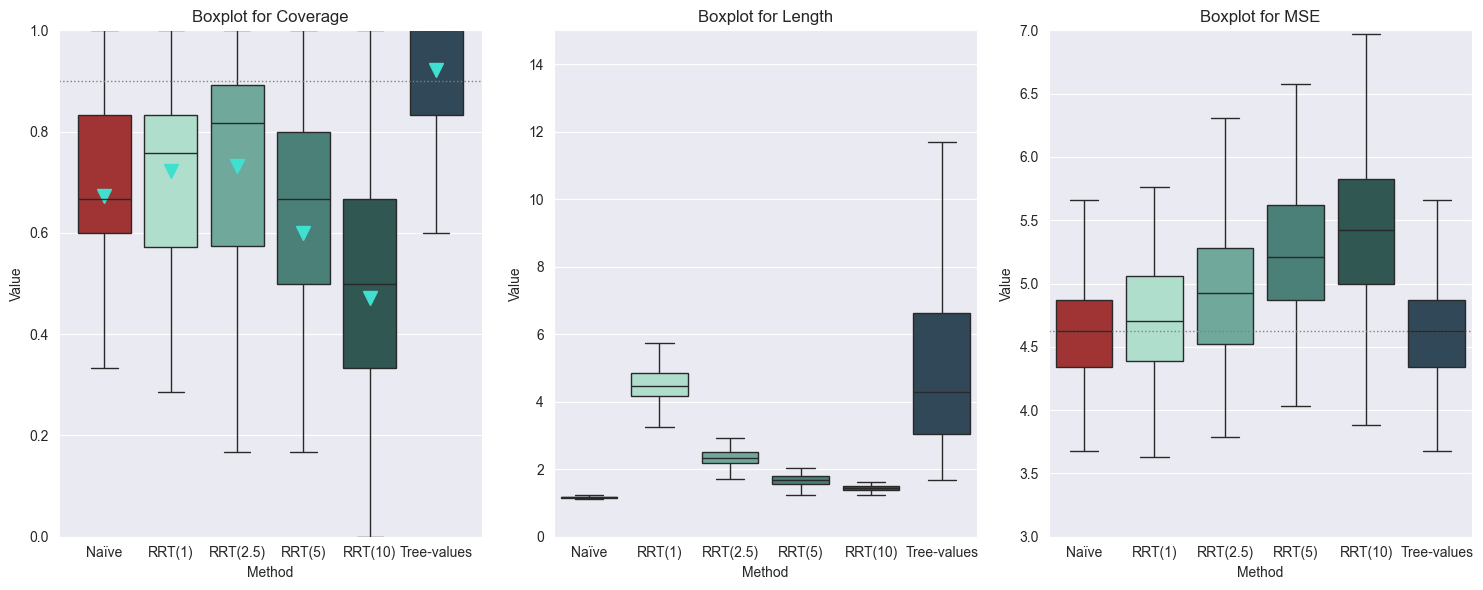

In [36]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])